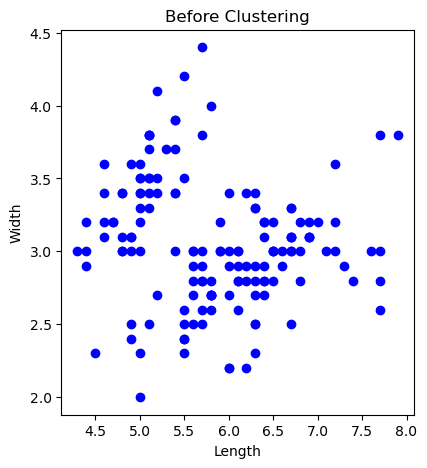

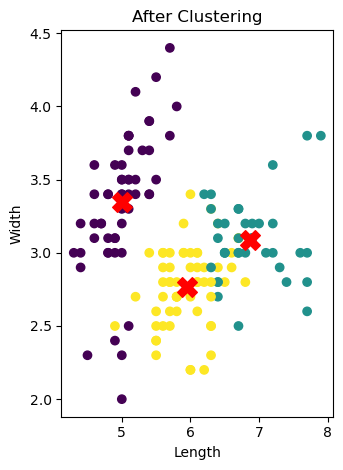

In [5]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

#定义Kmean类
class Kmeans:
    #取默认值：接收聚类数clusters和最大迭代次数num
    def __init__(self,clusters=3,num=100):
        self.clusters=clusters
        self.num=num

    #计算欧几里得距离的方法，用于衡量两个样本点之间的距离
    def distance(self,x1,x2):
        return np.sqrt(np.sum(x1-x2)**2)

    #训练Kmeans模型的方法
    def fit(self,X):
        # 随机从数据集中选择clusters个样本点作为初始质心
        self.centroids=X[np.random.choice(X.shape[0],self.clusters,replace=False)]
        for _ in range(self.num):
            # 保存上一轮的质心位置，用于判断是否收敛
            pre_cen=self.centroids.copy()
            labels=[]  # 用于存储每个样本点所属的簇标签
            for x in X:
                distances=[self.distance(x,cen) for cen in self.centroids]
                label=np.argmin(distances) # 找到距离最近的质心的索引
                labels.append(label)
            # 将标签列表转换为numpy数组
            labels=np.array(labels)

            # 更新质心位置
            for i in range(self.clusters):
                # 计算属于第i个簇的所有样本点的均值，作为新的质心
                self.centroids[i]=np.mean(X[labels==i],axis=0)
    
            # 判断当前质心与上一轮质心是否足够接近（即是否收敛）
            if np.allclose(self.centroids,pre_cen):
                break
    
        return labels

#加载iris数据集
iris=load_iris()
# 获取数据集中的特征数据
X = iris.data

#绘制聚类前的散点图
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c='b', label='Before Clustering')
plt.title('Before Clustering')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

# 实例化Kmeans类，设置聚类数为3
kmeans = Kmeans(clusters=3)
# 调用fit方法对数据进行聚类，得到预测的簇标签
predicted_labels = kmeans.fit(X)

# 绘制聚类后的散点图
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', label='After Clustering')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('After Clustering')
plt.xlabel('Length')
plt.ylabel('Width')

plt.tight_layout()
plt.show()